### Food Balances Indicators

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load


### Data Loading and Preprocessing

In [2]:
food_balances_indicators = pd.read_csv("../Food balances indicators - FAOSTAT_data_en_2-22-2024.csv")
food_balances_indicators.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [4]:
# Checking for missing values
missing_values = food_balances_indicators.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (FBS)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64


In [5]:
# Handling missing values if any
food_balances_indicators_cleaned = food_balances_indicators.dropna(axis=0).reset_index(drop=True)
food_balances_indicators_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.00,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.00,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.00,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.00,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.00,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148036,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2017,2017,1000 t,57.96,E,Estimated value
148037,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2018,2018,1000 t,46.91,E,Estimated value
148038,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2019,2019,1000 t,31.08,E,Estimated value
148039,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2020,2020,1000 t,31.08,E,Estimated value


In [6]:
# Handling missing values if any
food_balances_indicators_cleaned = food_balances_indicators.dropna(axis=1).reset_index(drop=True)
food_balances_indicators_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.00,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.00,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.00,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.00,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.00,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148036,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2017,2017,1000 t,57.96,E,Estimated value
148037,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2018,2018,1000 t,46.91,E,Estimated value
148038,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2019,2019,1000 t,31.08,E,Estimated value
148039,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2020,2020,1000 t,31.08,E,Estimated value


### Converting Categorial colunm to numbers

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in food_balances_indicators_cleaned.columns:
    if food_balances_indicators_cleaned[col].dtype == 'object':
        food_balances_indicators_cleaned[col] = label_encoder.fit_transform(food_balances_indicators_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(food_balances_indicators_cleaned), columns=food_balances_indicators_cleaned.columns)


In [8]:
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.000000,0.000000,0.0,0.003597,0.0,0.0
1,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.090909,0.090909,0.0,0.004378,0.0,0.0
2,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.181818,0.181818,0.0,0.003599,0.0,0.0
3,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.272727,0.272727,0.0,0.003867,0.0,0.0
4,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.363636,0.363636,0.0,0.003318,0.0,0.0


### Model Training and Evaluation

In [9]:

# Select relevant features
selected_features = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (FBS)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']
food_balances_indicators_selected = df_normalized[selected_features]


In [10]:
# Split the dataset into features (X) and target variable (y)
X = food_balances_indicators_selected[['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (FBS)', 'Item', 'Year Code', 'Year', 'Unit', 'Flag', 'Flag Description']]
y = food_balances_indicators_selected['Value']


In [11]:
X.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.090909,0.090909,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.181818,0.181818,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.272727,0.272727,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.363636,0.363636,0.0,0.0,0.0


In [12]:
# Split the dataset into training and testing sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### # Plot the relationship between each two variables to spot anything incorrect.

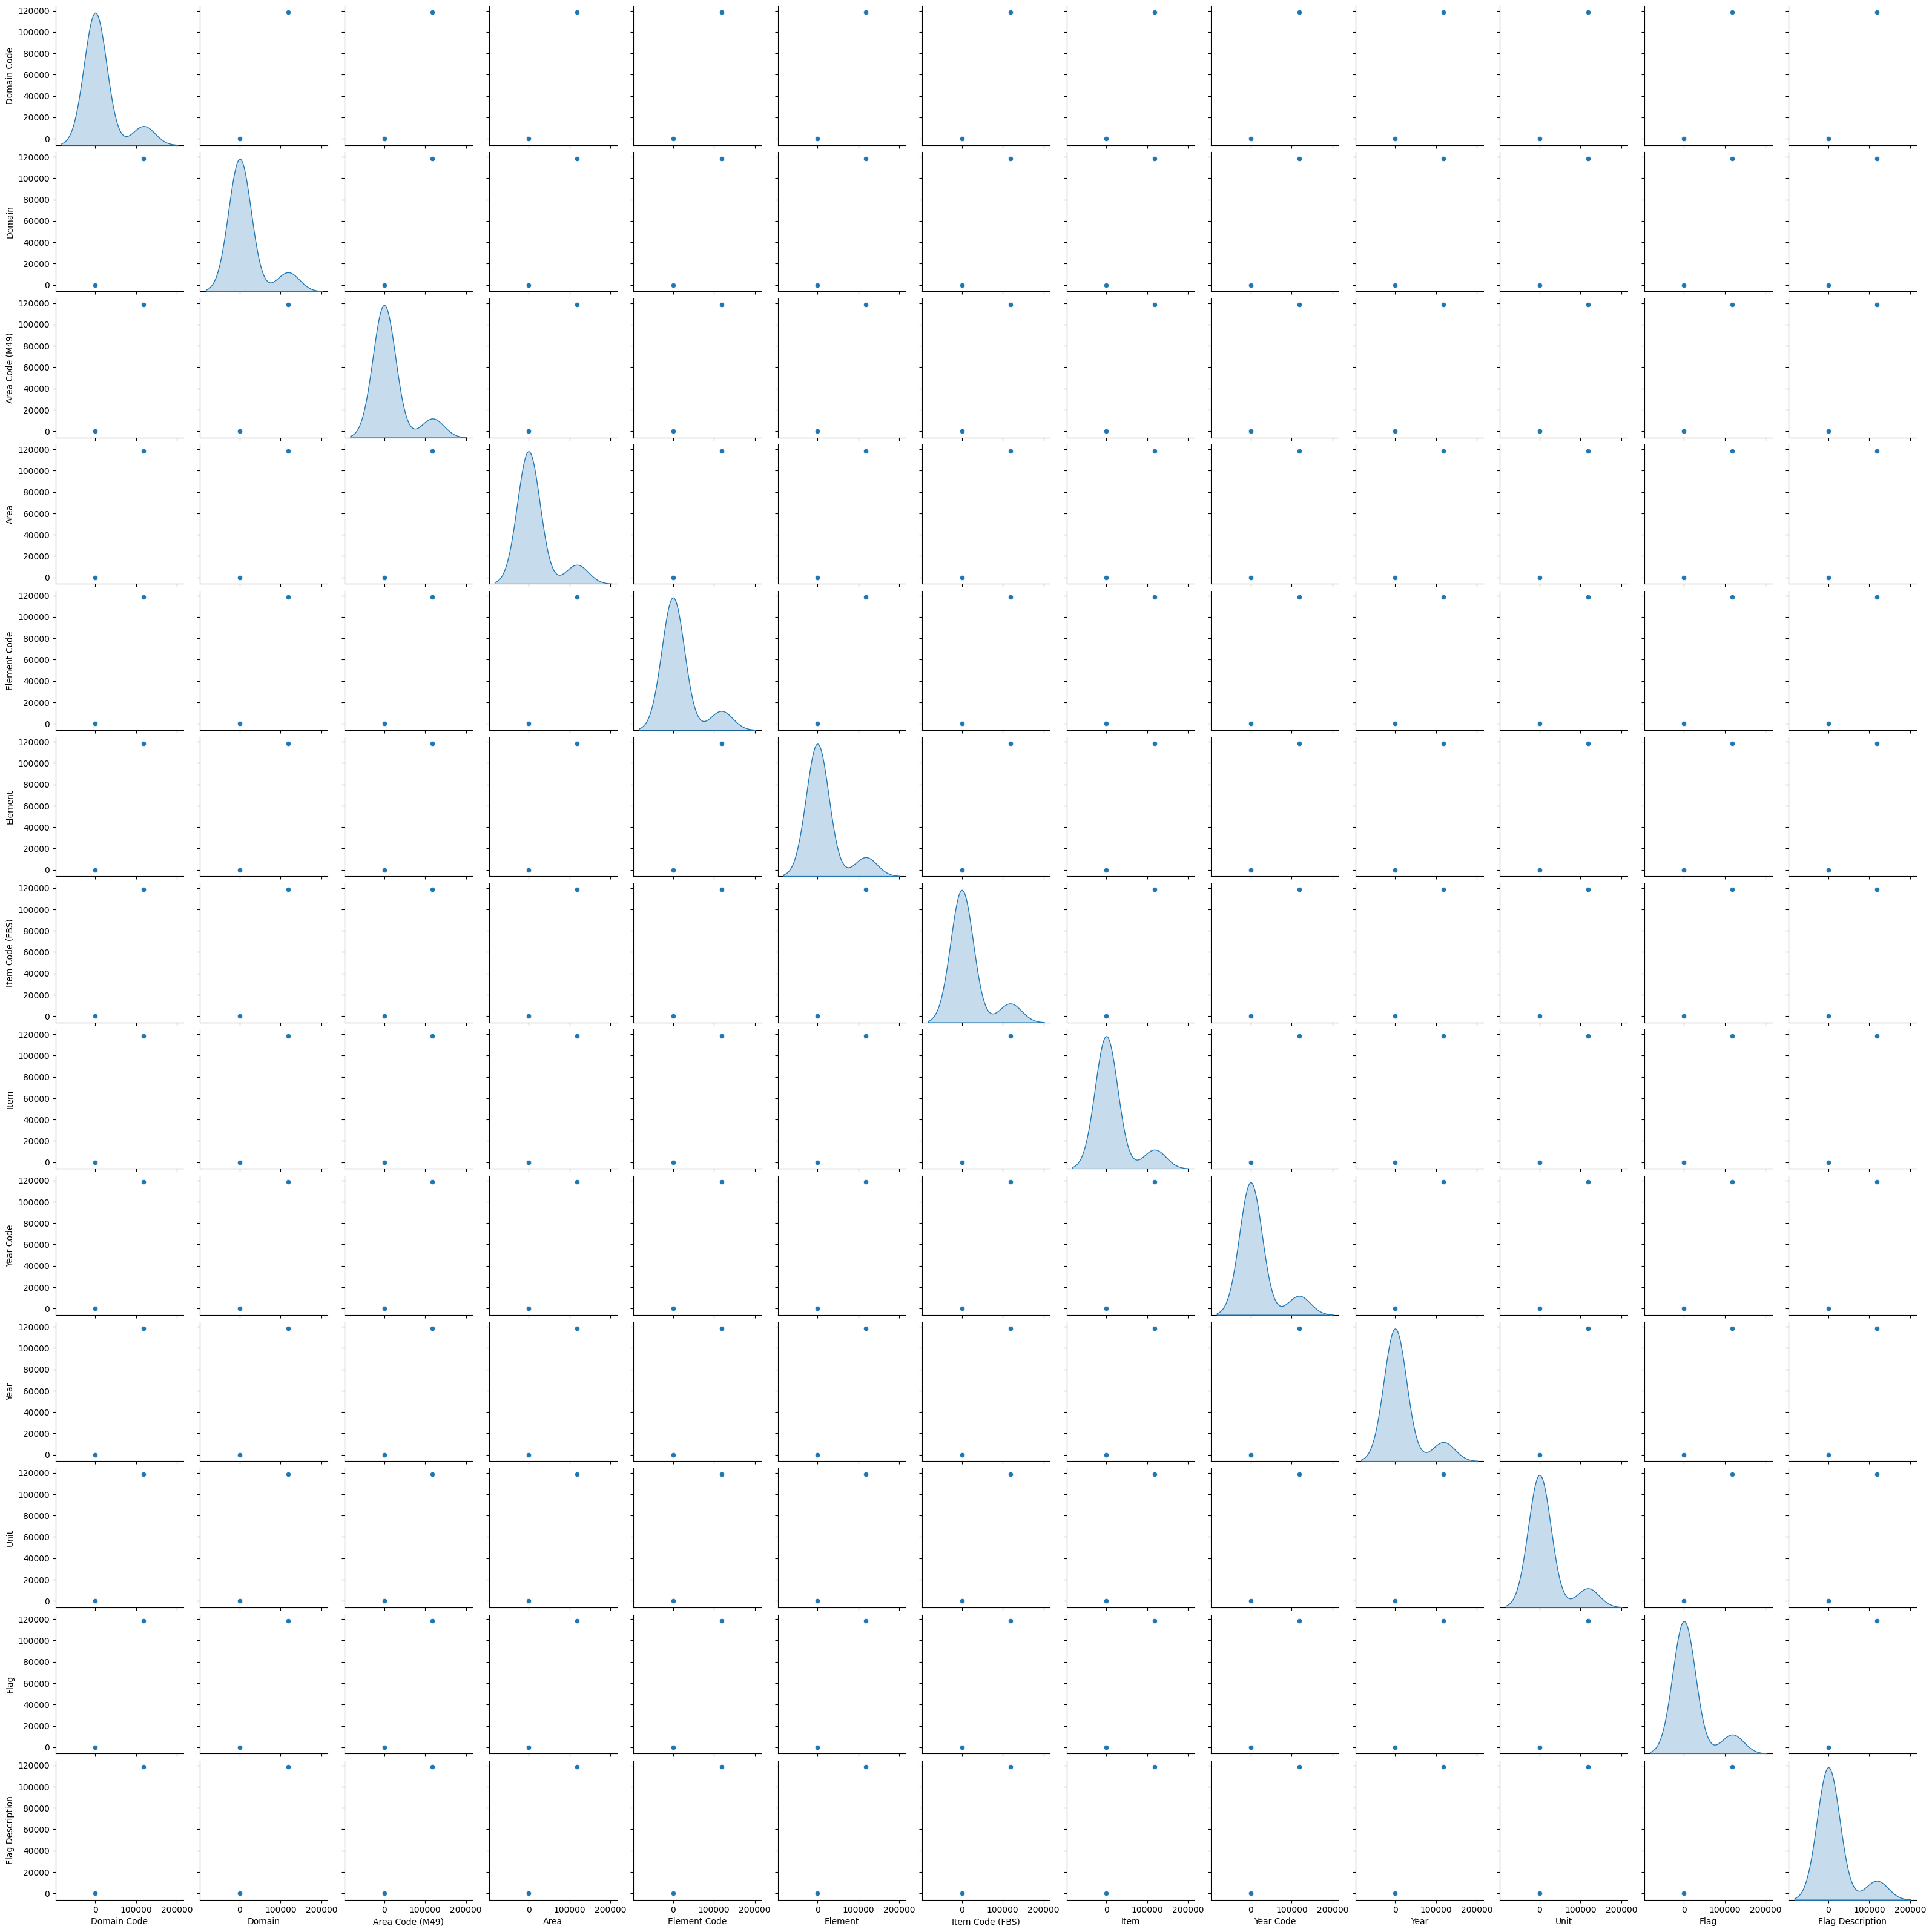

In [13]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = X_train.describe()
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [14]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)

Linear Regression Mean Squared Error: 0.0002669371288966786
Linear Regression Mean Absolute Error: 0.0026947501764364775


In [16]:
# MLP Regression Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
print("MLP Regression Mean Squared Error:", mlp_mse)
print("MLP Regression Mean Absolute Error:", mlp_mae)

MLP Regression Mean Squared Error: 0.0003666410214855254
MLP Regression Mean Absolute Error: 0.011076928932274547


### Model Evaluation Plots

<Figure size 1000x600 with 0 Axes>

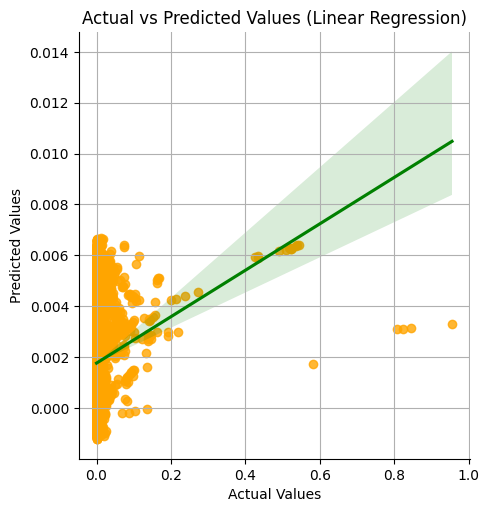

<Figure size 1000x600 with 0 Axes>

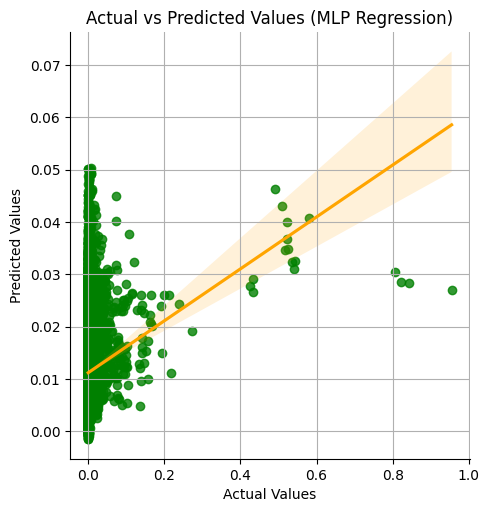

In [17]:

plot_data_lr = pd.DataFrame({'Actual': y_test, 'Predicted_LR': lr_predictions})
plot_data_mlp = pd.DataFrame({'Actual': y_test, 'Predicted_MLP': mlp_predictions})

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_lr, x='Actual', y='Predicted_LR', scatter_kws={'color': 'orange'}, line_kws={'color': 'green'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot actual vs predicted values for MLP Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_mlp, x='Actual', y='Predicted_MLP', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Actual vs Predicted Values (MLP Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


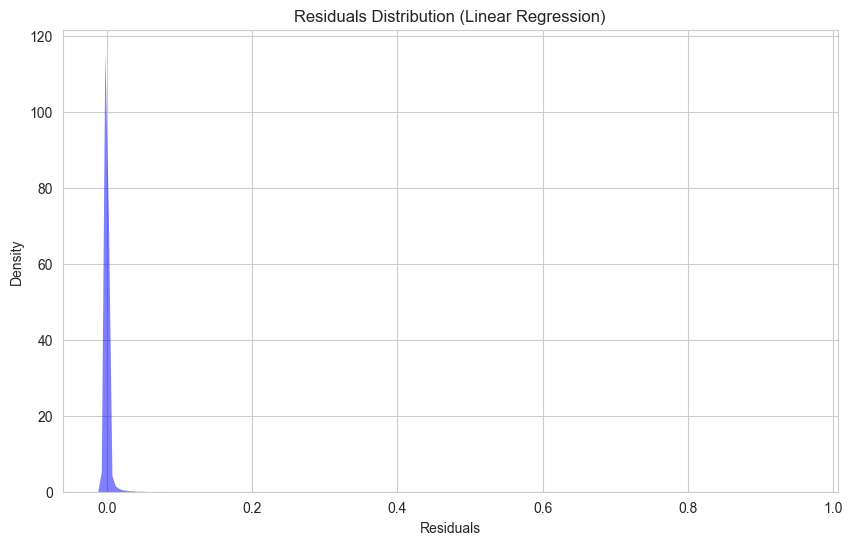

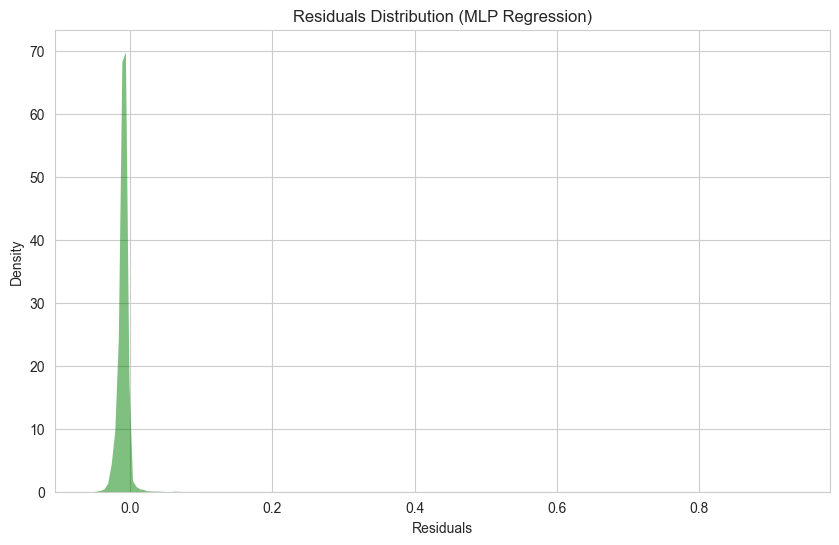

In [18]:
# Calculate residuals for Linear Regression
lr_residuals = y_test - lr_predictions

sns.set_style("whitegrid")

# Plot residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(lr_residuals, color='blue', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Calculate residuals for MLP Regression
mlp_residuals = y_test - mlp_predictions

# Plot residuals for MLP Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(mlp_residuals, color='green', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (MLP Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### Cross-Validation

Linear Regression Cross-Validation RMSE Scores: [0.0201773  0.01452227 0.01522953 0.01588061 0.01731954]
Linear Regression Mean RMSE: 0.016625849838488676
MLP Cross-Validation RMSE Scores: [0.02016586 0.01447229 0.01519179 0.0157866  0.01736609]
MLP Mean RMSE: 0.016596524545985085


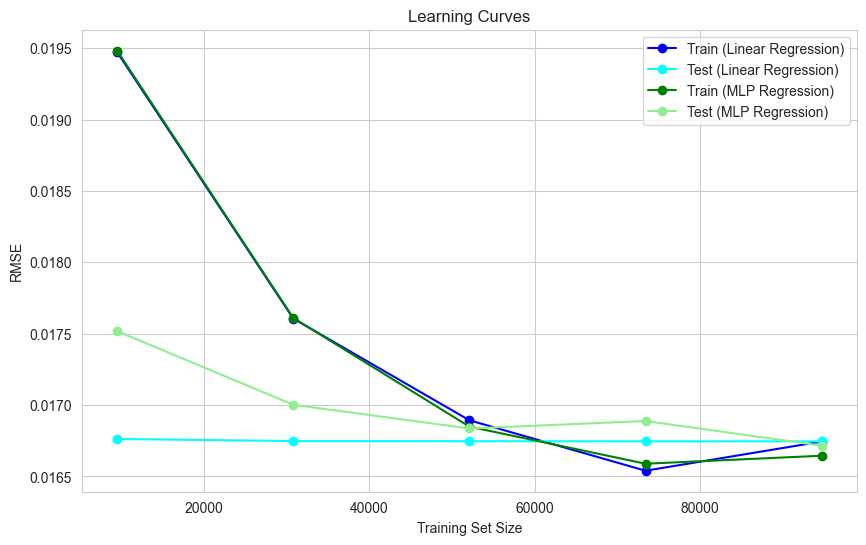

In [19]:
from sklearn.model_selection import cross_val_score, learning_curve

# Validate the models using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression Cross-Validation RMSE Scores:", lr_rmse_scores)
print("Linear Regression Mean RMSE:", lr_rmse_scores.mean())

mlp_scores = cross_val_score(mlp_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)
print("MLP Cross-Validation RMSE Scores:", mlp_rmse_scores)
print("MLP Mean RMSE:", mlp_rmse_scores.mean())

# Plot learning curves
plt.figure(figsize=(10, 6))

# Learning curve for Linear Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_lr = np.sqrt(-train_scores_lr.mean(axis=1))
test_rmse_lr = np.sqrt(-test_scores_lr.mean(axis=1))
plt.plot(train_sizes_lr, train_rmse_lr, 'o-', color='blue', label='Train (Linear Regression)')
plt.plot(train_sizes_lr, test_rmse_lr, 'o-', color='cyan', label='Test (Linear Regression)')

# Learning curve for MLP Regression
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_mlp = np.sqrt(-train_scores_mlp.mean(axis=1))
test_rmse_mlp = np.sqrt(-test_scores_mlp.mean(axis=1))
plt.plot(train_sizes_mlp, train_rmse_mlp, 'o-', color='green', label='Train (MLP Regression)')
plt.plot(train_sizes_mlp, test_rmse_mlp, 'o-', color='lightgreen', label='Test (MLP Regression)')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
df_normalized.drop(columns=['Area'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.000000,0.000000,0.0,0.003597,0.0,0.0
1,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.090909,0.090909,0.0,0.004378,0.0,0.0
2,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.181818,0.181818,0.0,0.003599,0.0,0.0
3,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.272727,0.272727,0.0,0.003867,0.0,0.0
4,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.363636,0.363636,0.0,0.003318,0.0,0.0


In [21]:
df_normalized.drop(columns=['Year Code'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code (FBS),Item,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.000000,0.0,0.003597,0.0,0.0
1,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.090909,0.0,0.004378,0.0,0.0
2,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.181818,0.0,0.003599,0.0,0.0
3,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.272727,0.0,0.003867,0.0,0.0
4,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.363636,0.0,0.003318,0.0,0.0


### Concatenate `Area` , `Year Code` Categorical Variable into the normalized data 

In [22]:
area_column = food_balances_indicators[['Area', 'Year Code']]

food_balances_indicators_area_concat = pd.concat([df_normalized, area_column], axis=1)

food_balances_indicators_area_concat.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code (FBS),Item,Year,Unit,Value,Flag,Flag Description,Area,Year Code
0,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.000000,0.0,0.003597,0.0,0.0,Afghanistan,2010
1,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.090909,0.0,0.004378,0.0,0.0,Afghanistan,2011
2,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.181818,0.0,0.003599,0.0,0.0,Afghanistan,2012
3,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.272727,0.0,0.003867,0.0,0.0,Afghanistan,2013
4,0.0,0.0,0.0,0.619289,0.5,0.0,0.0625,0.363636,0.0,0.003318,0.0,0.0,Afghanistan,2014


### Model Deployment

In [23]:
# Train a separate model for each geographical region and save them
regions = food_balances_indicators_area_concat['Area'].unique()
for region in regions:
    region_data = food_balances_indicators_area_concat[food_balances_indicators_area_concat['Area'] == region]
    X_region = region_data[['Year']]
    y_region = region_data['Value']
    
    model = LinearRegression()
    model.fit(X_region, y_region)
    

    # Save the trained model
    model_file = f'../model_deployment/model_food_balances_indicators/model_food_balances_indicators_{region}.joblib'
    dump(model, model_file)
    print(f"Model for {region} saved as {model_file}")

Model for Afghanistan saved as ../model_deployment/model_food_balances_indicators/model_food_balances_indicators_Afghanistan.joblib
Model for Albania saved as ../model_deployment/model_food_balances_indicators/model_food_balances_indicators_Albania.joblib
Model for Algeria saved as ../model_deployment/model_food_balances_indicators/model_food_balances_indicators_Algeria.joblib
Model for Angola saved as ../model_deployment/model_food_balances_indicators/model_food_balances_indicators_Angola.joblib
Model for Antigua and Barbuda saved as ../model_deployment/model_food_balances_indicators/model_food_balances_indicators_Antigua and Barbuda.joblib
Model for Argentina saved as ../model_deployment/model_food_balances_indicators/model_food_balances_indicators_Argentina.joblib
Model for Armenia saved as ../model_deployment/model_food_balances_indicators/model_food_balances_indicators_Armenia.joblib
Model for Australia saved as ../model_deployment/model_food_balances_indicators/model_food_balance

Forecast for Afghanistan:
   Year  Forecasted_Value
0  2025          0.396099
1  2026          0.396294
2  2027          0.396489

Forecast for Albania:
   Year  Forecasted_Value
0  2025          0.031696
1  2026          0.031712
2  2027          0.031727

Forecast for Algeria:
   Year  Forecasted_Value
0  2025          0.990782
1  2026          0.991271
2  2027          0.991760

Forecast for Angola:
   Year  Forecasted_Value
0  2025          0.162467
1  2026          0.162547
2  2027          0.162627

Forecast for Antigua and Barbuda:
   Year  Forecasted_Value
0  2025          0.002102
1  2026          0.002103
2  2027          0.002104

Forecast for Argentina:
   Year  Forecasted_Value
0  2025          1.880306
1  2026          1.881233
2  2027          1.882160

Forecast for Armenia:
   Year  Forecasted_Value
0  2025         -0.002821
1  2026         -0.002822
2  2027         -0.002824

Forecast for Australia:
   Year  Forecasted_Value
0  2025          0.438254
1  2026          0

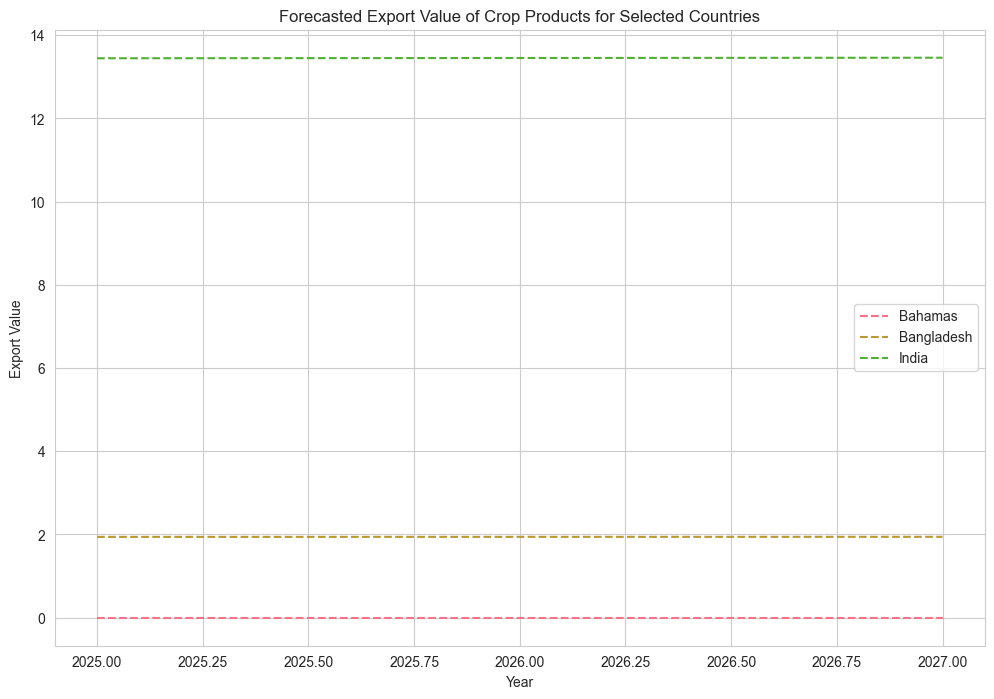

In [24]:
# Define a function to forecast the export value for a given region
def forecast_export_value(region, year):
    model = load(f'../model_deployment/model_food_balances_indicators/model_food_balances_indicators_{region}.joblib')
    forecast_years = [year + i for i in range(1, 4)]
    forecast_values = model.predict(pd.DataFrame({'Year': forecast_years}))
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Value': forecast_values})
    return forecast_df

# Perform forecasting for each geographical region
regions = food_balances_indicators_area_concat['Area'].unique()
forecast_results = {}   
for region in regions:
    forecast_results[region] = forecast_export_value(region, 2024)

# Display the forecast results for each region
for region, forecast_df in forecast_results.items():
    print(f"Forecast for {region}:")
    print(forecast_df)
    print()

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
countries_to_plot = ['Bahamas', 'Bangladesh', 'India']
for country in countries_to_plot:
    forecast_df = forecast_results[country]
    sns.lineplot(data=forecast_df, x='Year', y='Forecasted_Value', label=country, linestyle='--')

plt.title('Forecasted Export Value of Crop Products for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()
